# Neural Network

In [1]:
import inspect
import numpy as np
import matplotlib.pylab as plt
from activation import step, sigmoid, relu, softmax

def graph(f):
    x = np.arange(-5.0, 5.0, 0.1)
    y = f(x)
    
    plt.plot(x, y)
    plt.ylim(-0.1, 1.1)
    plt.show()

## Step Function

In [2]:
print(inspect.getsource(step))

def step(x):
    y = x > 0
    return y.astype(np.int)



In [3]:
# step: array to result
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y.astype(np.int)

array([0, 1, 1])

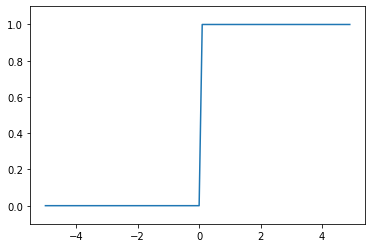

In [4]:
# step: graph
graph(step)

## Sigmoid Function

In [5]:
print(inspect.getsource(sigmoid))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))



In [6]:
# sigmoid: array to result
sigmoid(np.array([-1.0, 1.0, 2.0]))

array([0.26894142, 0.73105858, 0.88079708])

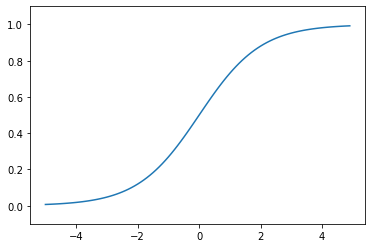

In [7]:
# sigmoid: graph
graph(sigmoid)

## ReLU: Retified Linear Unit

In [8]:
print(inspect.getsource(relu))

def relu(x):
    return np.maximum(0, x)



In [9]:
# relu: array to result
relu(np.array([-1.0, 1.0, 2.0]))

array([0., 1., 2.])

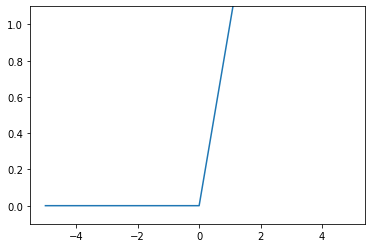

In [10]:
# relu: graph
graph(relu)

## Softmax

In [11]:
print(inspect.getsource(softmax))

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y



In [12]:
# softmax: array to result
x = np.array([0.3, 2.9, 4.0])
y = softmax(x)
print(np.sum(y), '=', y)

1.0 = [0.01821127 0.24519181 0.73659691]


---

## Practice

### Download: MNIST Dataset

숫자 인식 데이터셋 다운로드

In [13]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
# import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

# 새로운 창에서 미리보기
# img_show(img)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
5
(784,)
(28, 28)


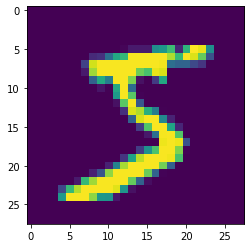

In [14]:
# 현재창에서 이미지 미리보기

from matplotlib.pyplot import imshow
%matplotlib inline
imshow(img)

### Batch: Neural Network

미리 학습된 모델의 가중치 매개변수가 저장된 파일: sample_weight.pkl

In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from activation import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

100개의 데이터마다 이미지 추론:

In [16]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

In [17]:
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
